In [1]:
from google.colab import files
import zipfile, os, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

uploaded = files.upload()
zip = "UCI HAR Dataset.zip"
extract = "UCI_HAR_Dataset"
with zipfile.ZipFile(zip, 'r') as zip_ref:
    zip_ref.extractall(extract)

train_path = os.path.join(extract, "UCI HAR Dataset", "train")
test_path  = os.path.join(extract, "UCI HAR Dataset", "test")

X_train = pd.read_csv(os.path.join(train_path, "X_train.txt"), sep='\s+', header=None)
y_train = pd.read_csv(os.path.join(train_path, "y_train.txt"), header=None)
X_test  = pd.read_csv(os.path.join(test_path,  "X_test.txt"),  sep='\s+', header=None)
y_test  = pd.read_csv(os.path.join(test_path,  "y_test.txt"),  header=None)

# Taghsime dadeha be amuzesho azmun
X_all = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y_all = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_scaled, y_all.values.ravel(),test_size=0.15, random_state=42, stratify=y_all)

print("Abaade amuzesh:", X_train_final.shape, "— Abaade azmun:", X_test_final.shape)


Saving UCI HAR Dataset.zip to UCI HAR Dataset.zip
Abaade amuzesh: (8754, 561) — Abaade azmun: (1545, 561)


In [2]:
# MLP
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

n = 6
# one-hot encoding
y_train_ohe = tf.keras.utils.to_categorical(y_train_final - 1, n)
y_test_ohe = tf.keras.utils.to_categorical(y_test_final - 1, n)


model = Sequential([Input(shape=(561,)),Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(n, activation='softmax'),])

# Adam ba laerning rate=0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# Amuzesh
history = model.fit(X_train_final, y_train_ohe,validation_split=0.1,
    epochs=50,batch_size=32)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        71,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,582 (314.77 KB)

 Trainable params: 80,582 (314.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.5640 - loss: 1.2098 - val_accuracy: 0.9361 - val_loss: 0.2354
Epoch 2/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8590 - loss: 0.3633 - val_accuracy: 0.9441 - val_loss: 0.1446
Epoch 3/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9015 - loss: 0.2603 - val_accuracy: 0.9600 - val_loss: 0.1043
Epoch 4/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9242 - loss: 0.2086 - val_accuracy: 0.9509 - val_loss: 0.1122
Epoch 5/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9381 - loss: 0.1827 - val_accuracy: 0.9600 - val_loss: 0.1002
Epoch 6/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9450 - loss: 0.1612 - val_accuracy: 0.9658 - val_loss: 0.0879
Epoch 7/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9507 - loss: 0.1378 - val_accuracy: 0.9635 - val_loss: 0.0907
Epoch 8/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9552 - loss: 0.1271 - val_accuracy: 

In [3]:
# CNN
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, GlobalAveragePooling1D

# Reshape baraye Conv1D
X_train_cnn = X_train_final.reshape(-1, 561, 1)
X_test_cnn  = X_test_final.reshape(-1, 561, 1)
y_test_ohe  = tf.keras.utils.to_categorical(y_test_final - 1, n)

model_cnn = Sequential([
    Input(shape=(561,1)),
    Conv1D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    Conv1D(256, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(n, activation='softmax'),
    ])

# Adam ba learning rate=0.001
optimizer_cnn = Adam(learning_rate=0.001)
model_cnn.compile(optimizer=optimizer_cnn,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
model_cnn.summary()

# Amuzesh
history_cnn = model_cnn.fit(X_train_cnn, y_train_ohe,
    validation_split=0.1,epochs=30,batch_size=64)

# Arzyabie nahayi
test_loss, test_acc = model_cnn.evaluate(X_test_cnn, y_test_ohe)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 561, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 561, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 280, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 280, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 280, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 280, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 140, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 140, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 140, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 140, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 70, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 70, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,982 (621.02 KB)

 Trainable params: 158,086 (617.52 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.4689 - loss: 1.1542 - val_accuracy: 0.3687 - val_loss: 3.0785
Epoch 2/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6129 - loss: 0.8231 - val_accuracy: 0.1986 - val_loss: 4.2036
Epoch 3/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6809 - loss: 0.6702 - val_accuracy: 0.3699 - val_loss: 3.9649
Epoch 4/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7579 - loss: 0.5510 - val_accuracy: 0.3779 - val_loss: 2.4615
Epoch 5/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7937 - loss: 0.4754 - val_accuracy: 0.6039 - val_loss: 0.8565
Epoch 6/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8463 - loss: 0.3823 - val_accuracy: 0.8208 - val_loss: 0.4681
Epoch 7/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8718 - loss: 0.3230 - val_accuracy: 0.9018 - val_loss: 0.2559
Epoch 8/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8822 - loss: 0.2970 - val_acc

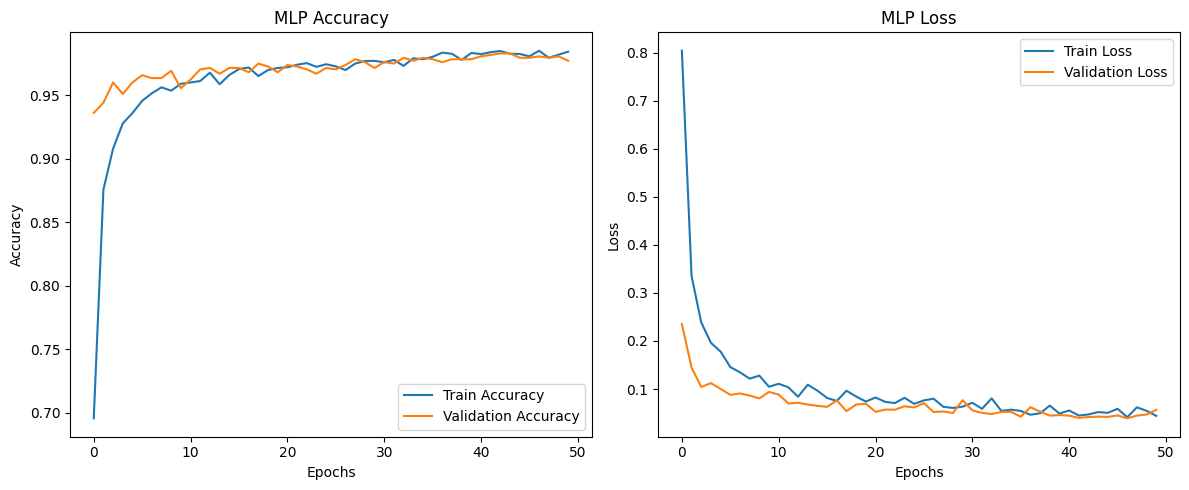

MLP Test Accuracy: 0.9812
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


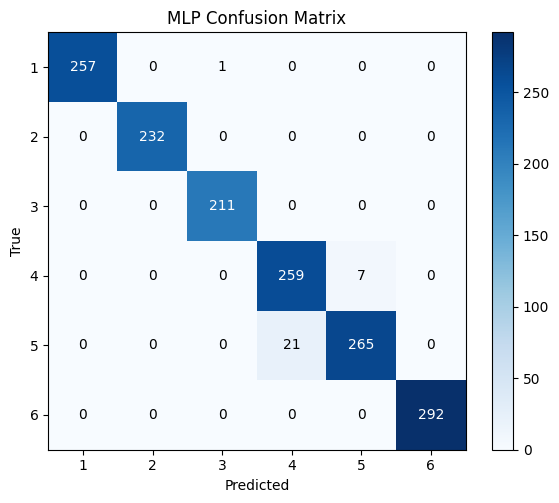

MLP Classification Report:

              precision    recall  f1-score   support

           1     1.0000    0.9961    0.9981       258
           2     1.0000    1.0000    1.0000       232
           3     0.9953    1.0000    0.9976       211
           4     0.9250    0.9737    0.9487       266
           5     0.9743    0.9266    0.9498       286
           6     1.0000    1.0000    1.0000       292

    accuracy                         0.9812      1545
   macro avg     0.9824    0.9827    0.9824      1545
weighted avg     0.9817    0.9812    0.9812      1545



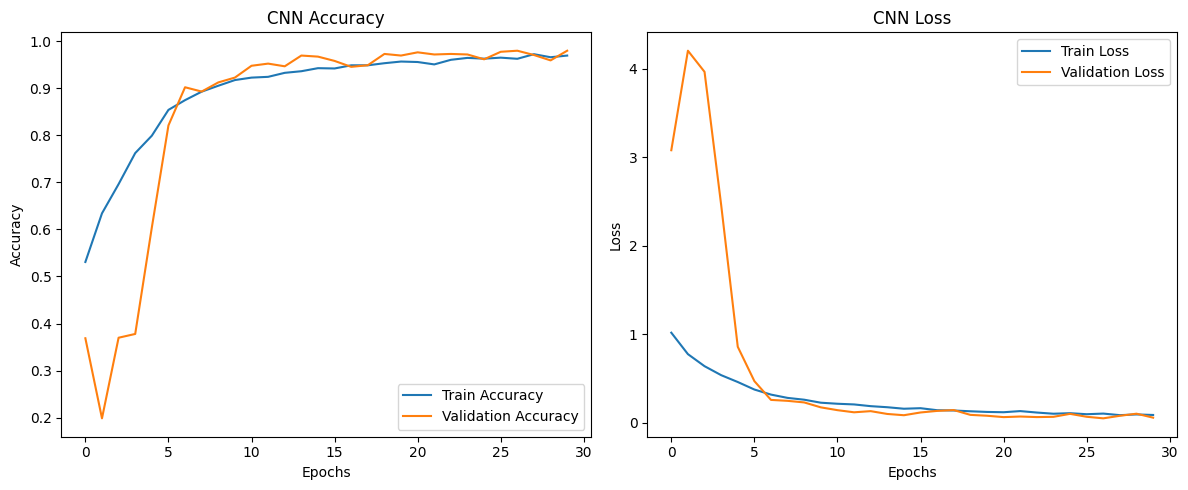

CNN Test Accuracy: 0.9773
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


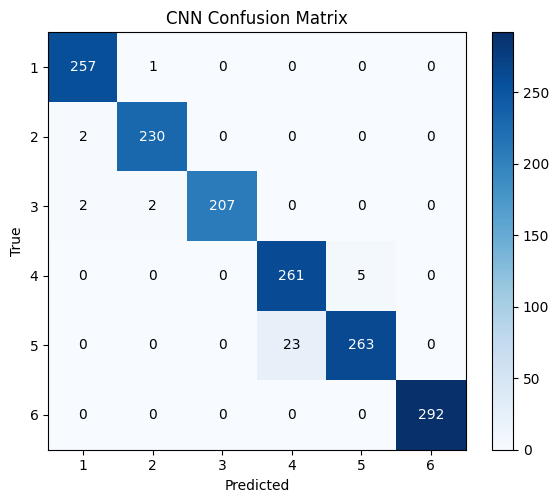

CNN Classification Report:

              precision    recall  f1-score   support

           1     0.9847    0.9961    0.9904       258
           2     0.9871    0.9914    0.9892       232
           3     1.0000    0.9810    0.9904       211
           4     0.9190    0.9812    0.9491       266
           5     0.9813    0.9196    0.9495       286
           6     1.0000    1.0000    1.0000       292

    accuracy                         0.9773      1545
   macro avg     0.9787    0.9782    0.9781      1545
weighted avg     0.9781    0.9773    0.9773      1545



In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Nemudare deghat o khata baraye MLP
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MLP Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Arzyabi
mlp_loss, mlp_acc = model.evaluate(X_test_final, y_test_ohe, verbose=0)
print(f"MLP Test Accuracy: {mlp_acc:.4f}")

mlp_preds = np.argmax(model.predict(X_test_final), axis=1) + 1
mlp_cm = confusion_matrix(y_test_final, mlp_preds)

plt.figure(figsize=(6,5))
plt.imshow(mlp_cm, cmap='Blues')
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
for i in range(6):
    for j in range(6):
        plt.text(j, i, mlp_cm[i, j], ha='center', va='center',
                 color='white' if mlp_cm[i, j] > mlp_cm.max()/2 else 'black')
plt.xticks(np.arange(6), np.arange(1,7))
plt.yticks(np.arange(6), np.arange(1,7))
plt.tight_layout()
plt.show()

print("MLP Classification Report:\n")
print(classification_report(y_test_final, mlp_preds, digits=4))

# Nemudare deghat o khata baraye CNN
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Arzyabi
cnn_loss, cnn_acc = model_cnn.evaluate(X_test_cnn, y_test_ohe, verbose=0)
print(f"CNN Test Accuracy: {cnn_acc:.4f}")

cnn_preds = np.argmax(model_cnn.predict(X_test_cnn), axis=1) + 1
cnn_cm = confusion_matrix(y_test_final, cnn_preds)

plt.figure(figsize=(6,5))
plt.imshow(cnn_cm, cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
for i in range(6):
    for j in range(6):
        plt.text(j, i, cnn_cm[i, j], ha='center', va='center',
                 color='white' if cnn_cm[i, j] > cnn_cm.max()/2 else 'black')
plt.xticks(np.arange(6), np.arange(1,7))
plt.yticks(np.arange(6), np.arange(1,7))
plt.tight_layout()
plt.show()

print("CNN Classification Report:\n")
print(classification_report(y_test_final, cnn_preds, digits=4))
